# Generating imbalancedness in tabular data

This tutorial shows how to generate imbalanced data on pre-existing tabular data and to visualize both the original and the transformed data




In [1]:
from sklearn.datasets import load_iris, make_blobs
from badgers.generators.tabular_data.imbalance import RandomSamplingClassesGenerator, RandomSamplingTargetsGenerator, RandomSamplingFeaturesGenerator
from badgers.core.utils import normalize_proba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Sample data from different classes

Here we are going to sample the dataset in a way that we will have 50% of all data coming from the first class, 5% coming form the second class, and 45% coming from the last class.

In [2]:
# load data
X, y = make_blobs(centers=4, random_state=0)

In [3]:
proportion_classes = {0:0.5, 1:0.05, 2:0.25, 3:0.2}
trf = RandomSamplingClassesGenerator(proportion_classes=proportion_classes)
Xt, yt = trf.generate(X.copy(),y)

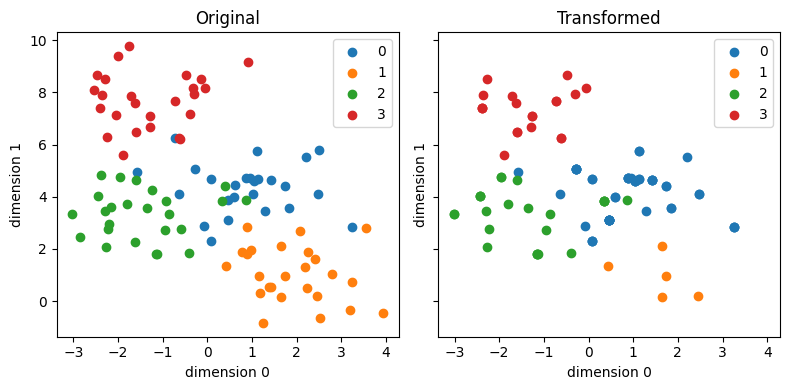

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
for label in np.unique(y):
    ix = np.where(y == label)[0]
    axes[0].scatter(X[ix,0], X[ix,1], c=f'C{label}', label=f'{label}')
for label in np.unique(yt):
    ix = np.where(yt == label)[0]
    axes[1].scatter(Xt[ix,0], Xt[ix,1], c=f'C{label}', label=f'{label}')

axes[0].set_title('Original')
axes[1].set_title('Transformed')
axes[0].set_xlabel('dimension 0', fontsize=10)
axes[1].set_xlabel('dimension 0', fontsize=10)
axes[0].set_ylabel('dimension 1', fontsize=10)
axes[1].set_ylabel('dimension 1', fontsize=10)
axes[0].legend()
axes[1].legend()
plt.tight_layout();

## Sample data based upon the regression target

Here, we create some imbalanced data set by sampling data points propotionally to the regression target.

For this tutorial we create a fake regression target `y`.


In [5]:
# generate fake regression target
y = -2*X[:,0] + 3*X[:,1] + 5

In [6]:
def sampling_proba_func(y):
    # this simply normalize the regression target
    return normalize_proba(
        (y-np.min(y)) / (np.max(y)-np.min(y))
    )

trf = RandomSamplingTargetsGenerator(sampling_proba_func=sampling_proba_func)
Xt,_ = trf.generate(X.copy(),y)

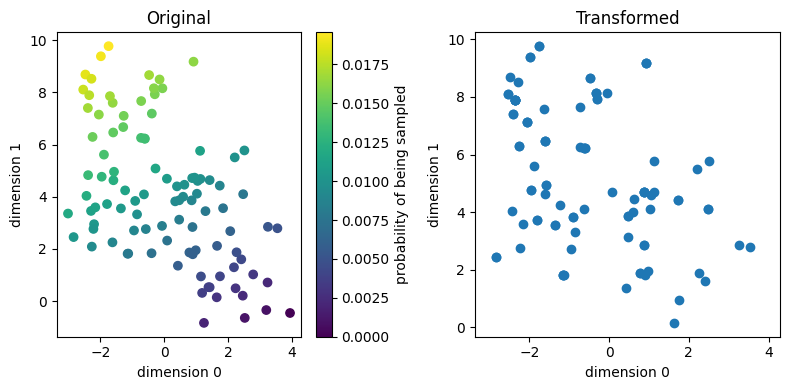

In [7]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(8,4))

sc = axes[0].scatter(X[:,0], X[:,1], c=sampling_proba_func(y))
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('probability of being sampled', rotation=90)
axes[1].scatter(Xt[:,0], Xt[:,1])
axes[0].set_title('Original')
axes[1].set_title('Transformed')
axes[0].set_xlabel('dimension 0', fontsize=10)
axes[1].set_xlabel('dimension 0', fontsize=10)
axes[0].set_ylabel('dimension 1', fontsize=10)
axes[1].set_ylabel('dimension 1', fontsize=10)
plt.tight_layout();

## Sample data based upon the features themselves

Instead of using the classification labels or the regression target, we create an imbalanced data set in which we remove data points based upon some features.

In the example below we use the value of the first features `X[:,0]` to determing whether a data point will be removed, therefore creating a kind of imbalancedness.


In [8]:
def sampling_proba_func(X):
    feature = X[:,0]
    return normalize_proba(
        (feature - np.min(feature)) / (np.max(feature)-np.min(feature))
    )

trf = RandomSamplingFeaturesGenerator(sampling_proba_func=sampling_proba_func)
Xt, _ = trf.generate(X.copy(), y)

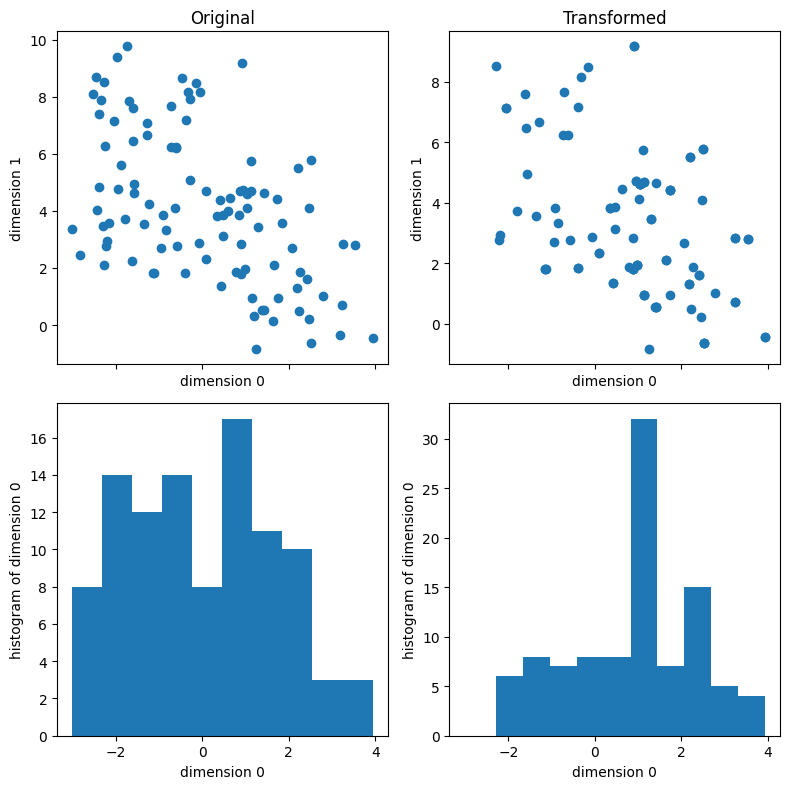

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(8,8))

axes[0,0].scatter(X[:,0], X[:,1])
axes[0,1].scatter(Xt[:,0], Xt[:,1])
axes[1,0].hist(X[:,0], density=False)
axes[1,1].hist(Xt[:,0], density=False)
axes[0,0].set_title('Original')
axes[0,1].set_title('Transformed')
axes[0,0].set_xlabel('dimension 0', fontsize=10)
axes[0,1].set_xlabel('dimension 0', fontsize=10)
axes[0,0].set_ylabel('dimension 1', fontsize=10)
axes[0,1].set_ylabel('dimension 1', fontsize=10)
axes[1,0].set_xlabel('dimension 0', fontsize=10)
axes[1,1].set_xlabel('dimension 0', fontsize=10)
axes[1,0].set_ylabel('histogram of dimension 0', fontsize=10)
axes[1,1].set_ylabel('histogram of dimension 0', fontsize=10)
plt.tight_layout();